Additional packages needed for signal plotting:

- matplotlib
- kaleido
- plotly
- pandas

These can be installed with the following command: `pip install matplotlib kaleido plotly pandas`

In [1]:
#import plotting functions from plot.py file
import plot

# 0. Preprocessing

In [2]:
# Provide data for modified reads

# Provide a BAM file containing move tables
mod_bam='mod.bam'

# Provide a POD5 file or path to a folder containing several POD5 files
mod_base_path='mod.pod5'

# Create a table of POD5 filename for each read. This needs to be run once and can be resued for different loci.
mod_file_names=plot.get_file_names(mod_base_path)

In [3]:
# Provide data for unmodified reads


# Provide a BAM file containing move tables
unmod_bam='unmod.bam'

# Provide a POD5 file or path to a folder containing several POD5 files
unmod_base_path='unmod.pod5'

# Create a table of POD5 filename for each read. This needs to be run once and can be resued for different loci.
unmod_file_names=plot.get_file_names(unmod_base_path)

In [4]:
# Specify chromosome, position and strand for the position of interest
# Window size determines how many bases before or after the position of interest to include in the plot
pos=2700007
strand='+'
chrom='chr11'
window=10

In [5]:
# Process signal for the first sample
mod_data=plot.get_signals(mod_bam, chrom, pos, strand, mod_file_names, mod_base_path, window=window, seq_type='dna' ,max_cov=1000, norm_type='STD')

In [6]:
# Process signal for the second sample
unmod_data=plot.get_signals(unmod_bam, chrom, pos, strand, unmod_file_names, unmod_base_path, window=window, seq_type='dna' ,max_cov=1000, norm_type='STD')

# 1. Signal Visualization for A Single Sample

## 1.1 Plot of Signals Overlayed from All Reads

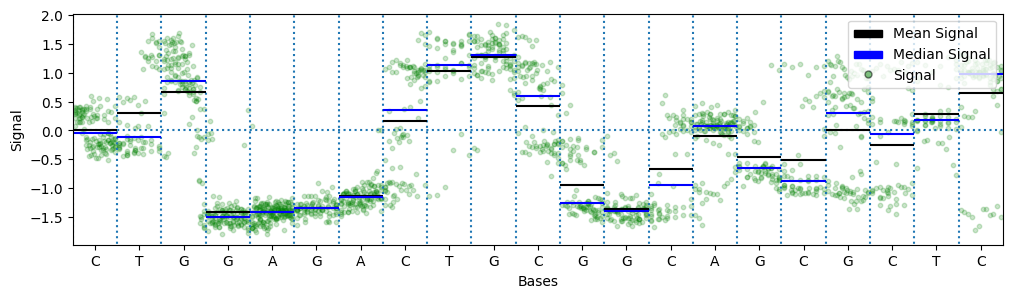

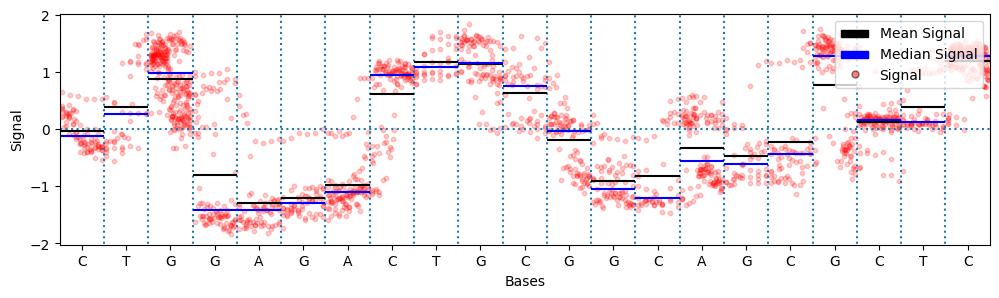

In [7]:
#plot signal for all reads in the modified data
plot.plot_single_sample(mod_data)

#plot signal for all reads in the unmodified data
plot.plot_single_sample(unmod_data, color='red')

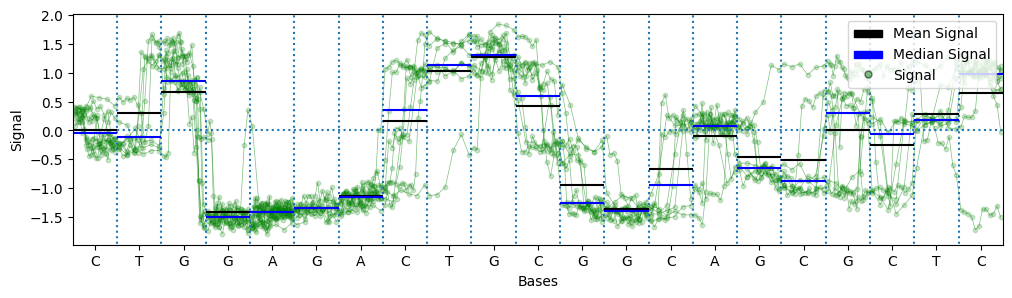

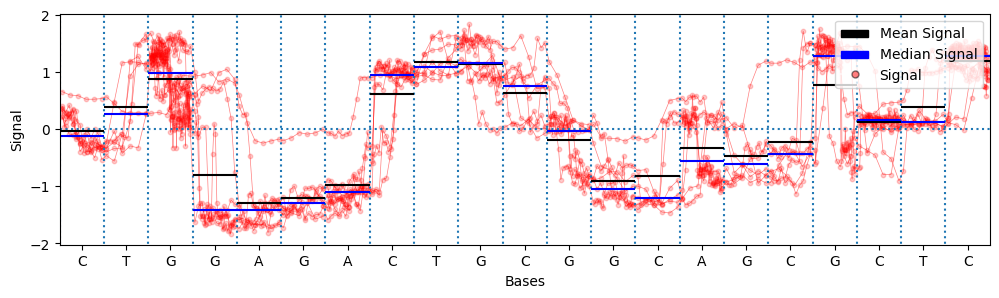

In [8]:
#connect signal values of each read with line

#plot for modified data
plot.plot_single_sample(mod_data, line_plot=True)

#plot for unmodified data
plot.plot_single_sample(unmod_data, line_plot=True, color='red')

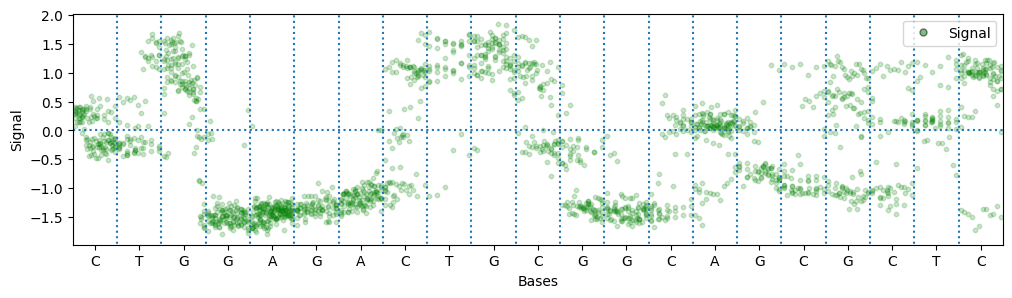

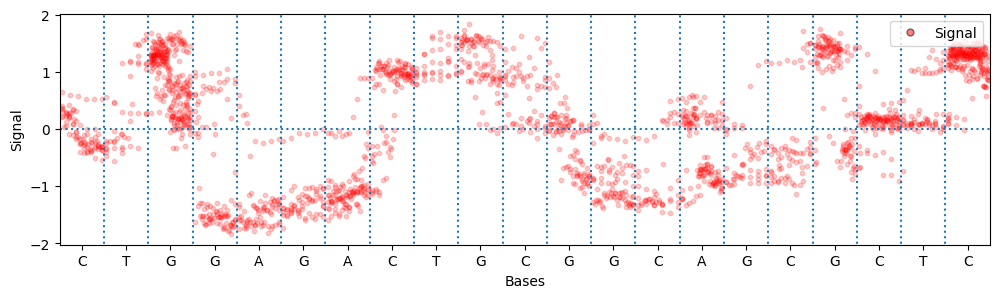

In [9]:
#disable mean and median bars

#plot for modified data
plot.plot_single_sample(mod_data, display_average=False)

#plot for unmodified data
plot.plot_single_sample(unmod_data, display_average=False, color='red')

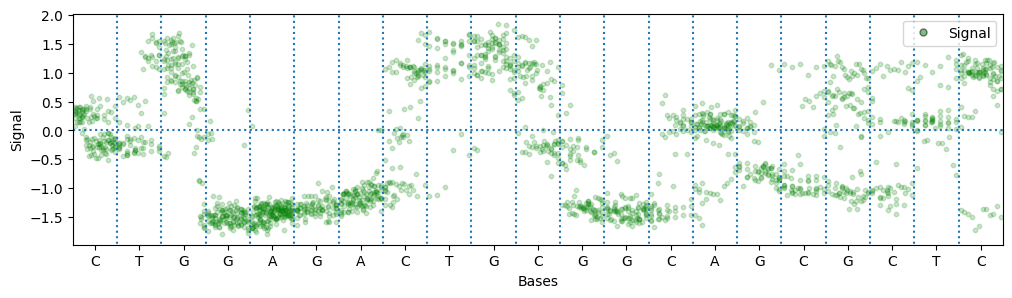

In [10]:
#plot and save the figure as PNG for modified data
plot.plot_single_sample(mod_data, display_average=False, save_path='my_plot.png')

## 1.2 Violin Plots of Mean/Median Base-Signal Over All Reads

### Interactive Plot

In [11]:
#use median signal for each base to create violin plot
plot.violin_plot(mod_data, avg_type='median')

In [12]:
#use mean signal for each base to create violin plot and save it to an HTML file
plot.violin_plot(mod_data, avg_type='mean',  save_path='violin_plot.html')

### Static Image Plot

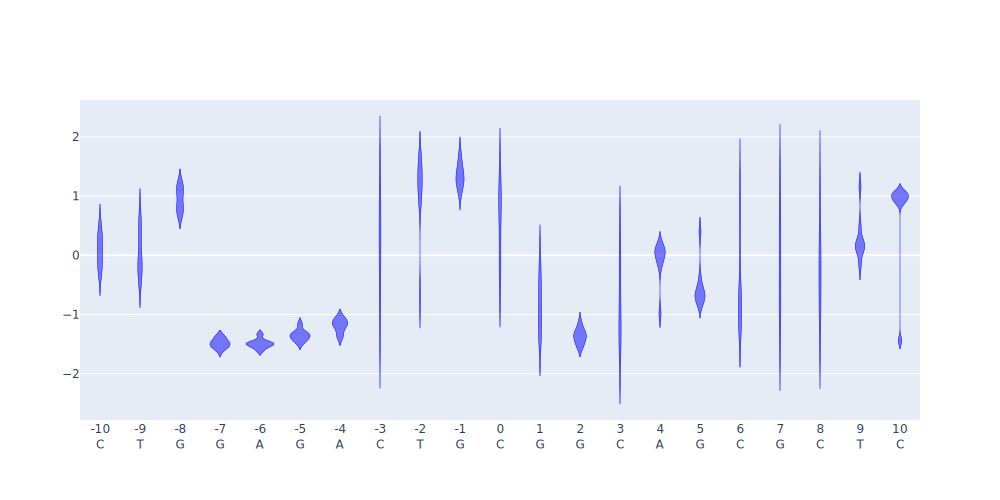

In [13]:
# create a static SVG image of the plot
plot.violin_plot(mod_data, avg_type='median', static_display=True)

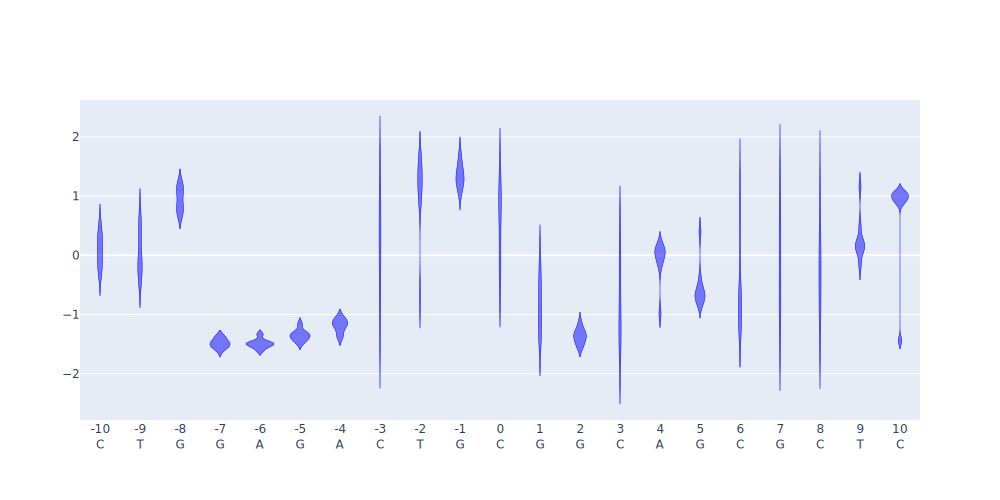

In [14]:
# create a static SVG image of the plot and save the figure asn PNG
plot.violin_plot(mod_data, avg_type='median', static_display=True, save_path='violin_plot.png')

# 2. Signal Comparison Between Two Samples

## 2.1 Plot of Signals Overlayed from All Reads

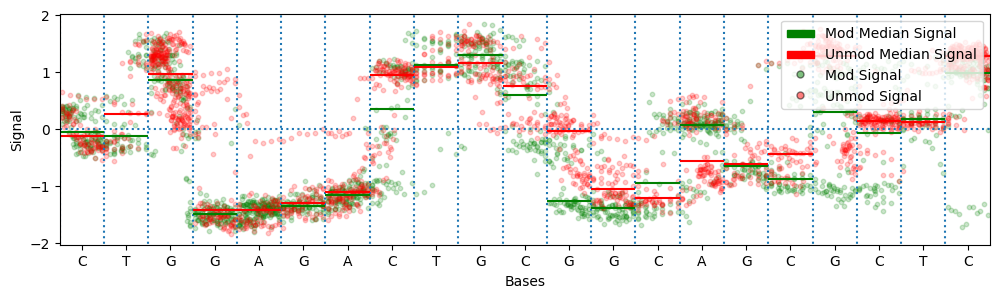

In [15]:
plot.plot_two_samples(mod_data, unmod_data, label1='Mod', label2='Unmod', line_plot=False)

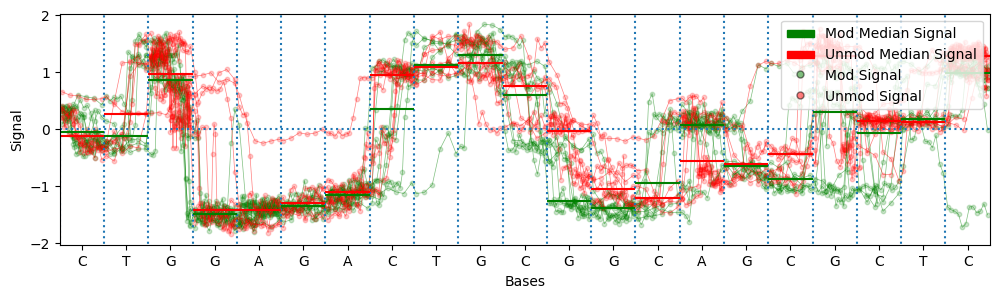

In [16]:
plot.plot_two_samples(mod_data, unmod_data, label1='Mod', label2='Unmod', line_plot=True)

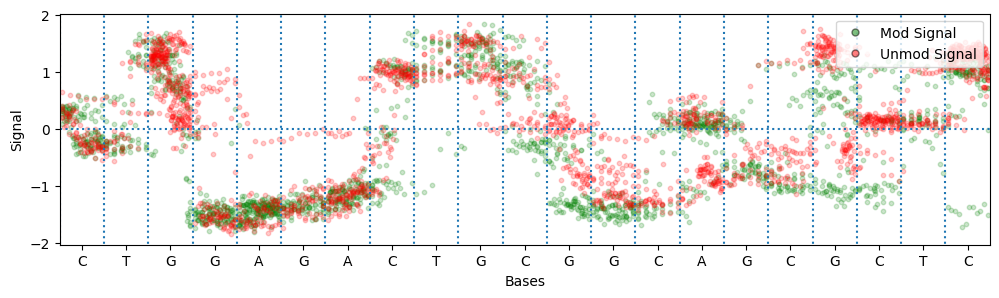

In [17]:
plot.plot_two_samples(mod_data, unmod_data, label1='Mod', label2='Unmod', display_average=False)

## 2.2 Comparison of Violin Plots of Mean/Median Base-Signal Over All Reads

### Interactive Plot

In [18]:
#use median signal for each base to create violin plot
plot.compare_violin_plot(mod_data, unmod_data, label1='Mod', label2='Unmod', avg_type='median')

In [19]:
#use mean signal for each base to create violin plot and save it at HTML
plot.compare_violin_plot(mod_data, unmod_data, label1='Mod', label2='Unmod', avg_type='mean', save_path='compare_violin.html')

### Static Image Plot

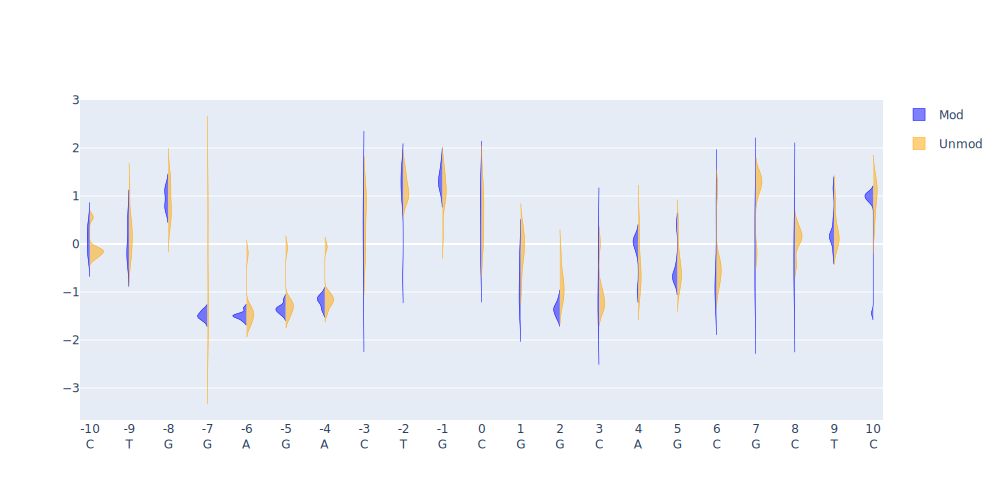

In [20]:
# create a static SVG image of the plot
plot.compare_violin_plot(mod_data, unmod_data, label1='Mod', label2='Unmod', avg_type='median', static_display=True)

# 3. Display Signal Plot of Individual Reads

c58a7a74-dbbc-4d18-9389-c96f0045e788


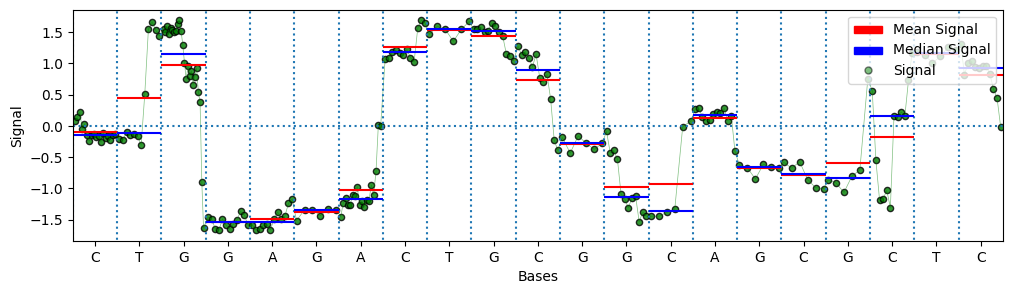

---------------------------------------------------------
468a1ecc-3729-43c3-ab64-49e54fed5007


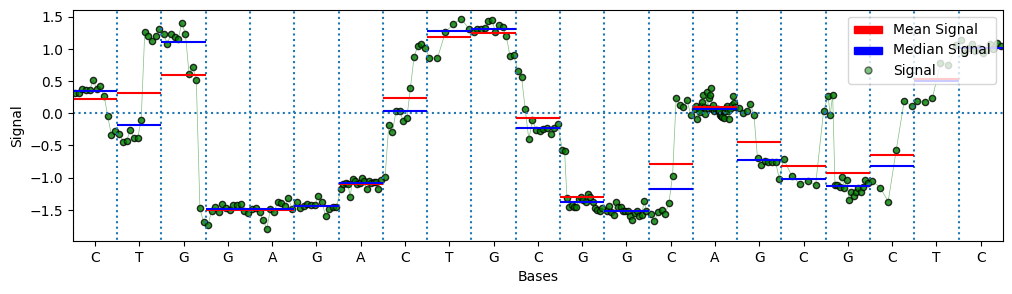

---------------------------------------------------------
d17e1800-d647-4296-a38d-d6db047433e0


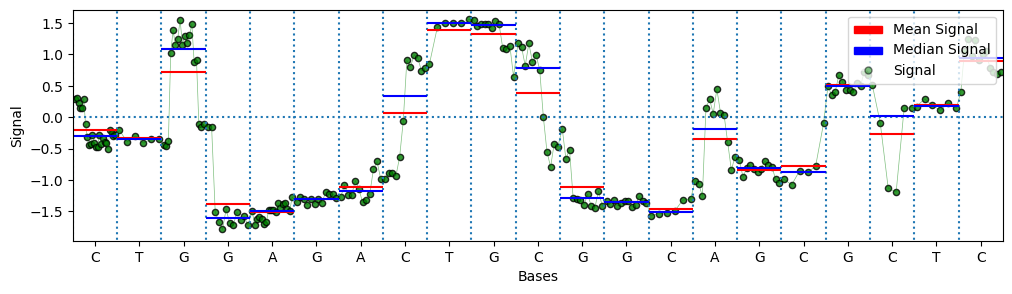

---------------------------------------------------------
5cb4b498-6425-4dfb-bae6-43c8faed7001


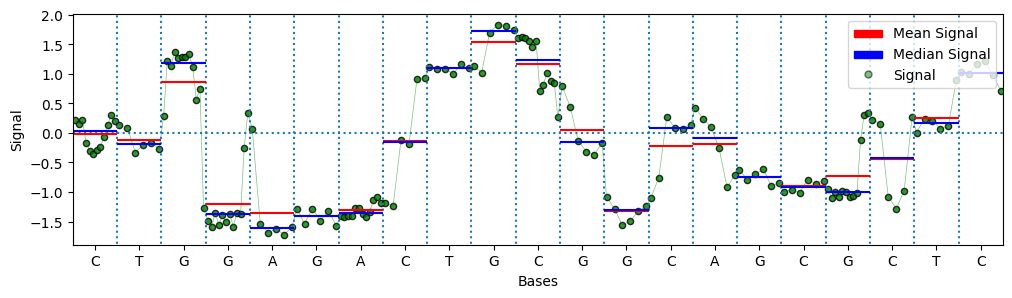

---------------------------------------------------------
fab035a6-463c-4f91-b7bb-7906a1a56453


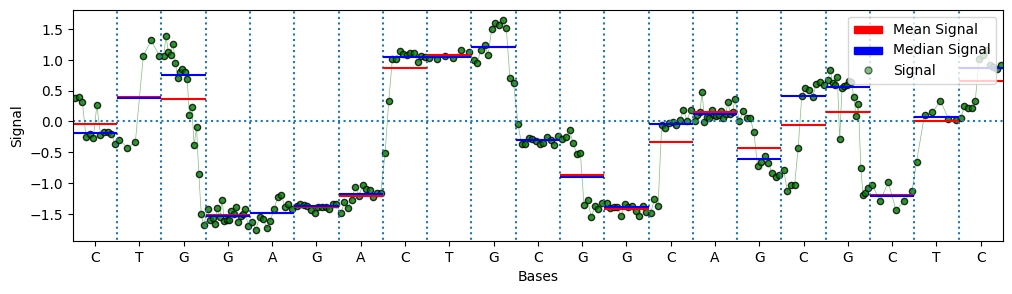

---------------------------------------------------------
cb9401e2-d1be-452f-a034-3f2ae1d81aaf


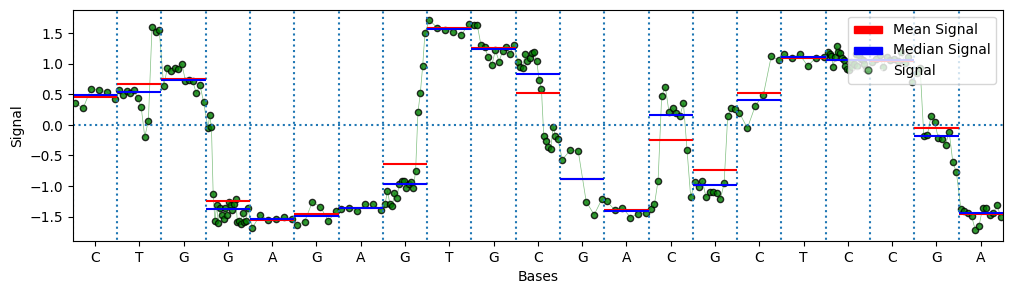

---------------------------------------------------------
2bc614df-dab2-4cb0-a20c-161b020074de


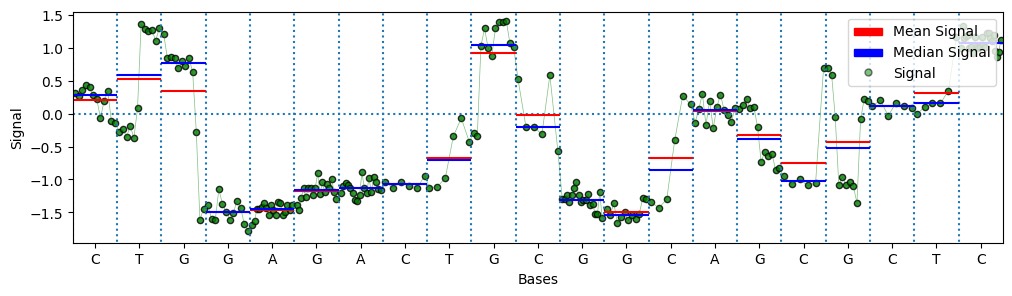

---------------------------------------------------------
5cb92f97-c5e4-4949-bdbd-d71260ab5049


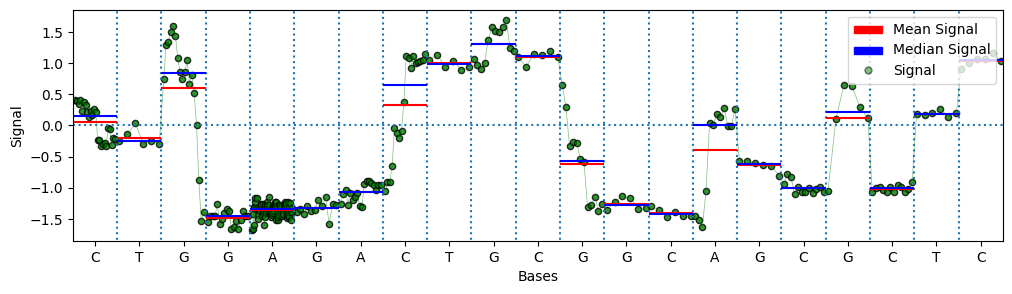

---------------------------------------------------------


In [21]:
for read, read_data in mod_data.items():
    print(read)
    plot.plot_read(read_data)
    print('---------------------------------------------------------')